drop of 186,000 residents between 2015 and 2016 according to the New York Business Journal

## Web Scraping (www.trulia.com): Analysis and Visualization
##### by Sabbir Mohammed

Initializing Packages:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Loading Dataset:

In [2]:
trulia = pd.read_csv('trulia_complete.csv')

In [3]:
trulia = trulia.drop('Unnamed: 0', 1)

In [4]:
trulia = trulia.astype({'zipCode':str})

In [80]:
pricepersqft = pd.Series(trulia.soldPrice / trulia.sqft)
trulia['PricePerSQFT'] = pricepersqft

In [ ]:
# trulia['soldPrice'] = trulia['soldPrice'].apply(lambda x: "{:,}".format(x))

# Preparing Data:

In [81]:
trulia.head(10)

,address,city,soldDate,soldPrice,sqft,zipCode,borough,PricePerSQFT
0,245 E 93rd St #26C,New York,21-Dec-18,1399999.0,1056,10128,Manhattan,1325.756629
1,15 Broad St #2320,New York,21-Dec-18,2150000.0,1772,10005,Manhattan,1213.318284
2,510 W 110th St #12D,New York,21-Dec-18,660000.0,616,10025,Manhattan,1071.428571
3,405 W 50th St,New York,21-Dec-18,NaN,9775,10019,Manhattan,NaN
4,407 W 50th St,New York,21-Dec-18,NaN,9775,10019,Manhattan,NaN
5,155 W 70th St #12E,New York,21-Dec-18,950000.0,1302,10023,Manhattan,729.646697
6,200 E 66th St #E2006,New York,21-Dec-18,NaN,955,10065,Manhattan,NaN
7,200 E 24th St #1809,New York,21-Dec-18,650000.0,158337,10010,Manhattan,4.105168
8,181 E 90th St #26A,New York,21-Dec-18,3200000.0,1948,10128,Manhattan,1642.710472
9,58 W 129th St #2C,New York,21-Dec-18,494000.0,479,10027,Manhattan,1031.315240


In [82]:
trulia.shape

(13267, 8)

In [83]:
round(trulia.describe(), 2)

,soldPrice,sqft,PricePerSQFT
count,11315.00,13267.00,11315.00
mean,880200.73,6032.99,573.92
std,858014.41,33631.69,765.58
min,10.00,187.00,0.00
25%,520000.00,1155.00,325.42
50%,705000.00,1592.00,451.13
75%,970000.00,2292.00,661.39
max,44580000.00,883265.00,68796.30


Checking specific values:

In [249]:
trulia.loc[trulia.soldPrice == 44580000.00]

,address,city,soldDate,soldPrice,sqft,zipCode,borough,PricePerSQFT
507,26 Hillwood Ct,Staten Island,15-Jun-18,44580000.0,648,10305,Staten Island,68796.296296


### Handling missing values:

In [85]:
np.sum(trulia.isnull())

address            0
city               0
soldDate           0
soldPrice       1952
sqft               0
zipCode            0
borough            0
PricePerSQFT    1952
dtype: int64

In [240]:
trulia_copy1 = trulia.loc[trulia.soldPrice.isnull() == False]

In [243]:
trulia_copy1.head()

,address,city,soldDate,soldPrice,sqft,zipCode,borough,PricePerSQFT
0,245 E 93rd St #26C,New York,21-Dec-18,1399999.0,1056,10128,Manhattan,1325.756629
1,15 Broad St #2320,New York,21-Dec-18,2150000.0,1772,10005,Manhattan,1213.318284
2,510 W 110th St #12D,New York,21-Dec-18,660000.0,616,10025,Manhattan,1071.428571
5,155 W 70th St #12E,New York,21-Dec-18,950000.0,1302,10023,Manhattan,729.646697
7,200 E 24th St #1809,New York,21-Dec-18,650000.0,158337,10010,Manhattan,4.105168


In [246]:
round(trulia_copy1.describe(),2)

,soldPrice,sqft,PricePerSQFT
count,11315.00,11315.00,11315.00
mean,880200.73,6056.46,573.92
std,858014.41,35225.27,765.58
min,10.00,224.00,0.00
25%,520000.00,1138.50,325.42
50%,705000.00,1524.00,451.13
75%,970000.00,2160.00,661.39
max,44580000.00,883265.00,68796.30


### Outliers (PENDING)

In [235]:
sold = trulia_copy1.soldPrice.loc[trulia_copy1.soldPrice.apply(lambda x: (np.abs(x - np.mean(x))/np.std(x)) < 1)]

In [238]:
sold[1:10]

Series([], Name: soldPrice, dtype: float64)

# Analysis by Borough

In [138]:
trulia_borough = trulia_copy1.groupby('borough')
summaryborough = round(trulia_borough.agg(['count', 'mean', 'std']), 3)
summaryborough

soldPrice                            sqft                        \
                  count         mean          std count       mean        std   
borough                                                                         
Bronx              1273   530538.121   265929.544  1273   2383.314   6412.720   
Brooklyn           3047  1064731.482   735927.796  3047   7136.969  42829.347   
Manhattan          1097  1716700.270  1616463.039  1097  11426.018  45640.966   
Queens             3937   765146.343   332193.463  3937   7116.907  39106.759   
Staten Island      1961   583507.397  1020134.015  1961   1629.237    751.918   

              PricePerSQFT                      
                     count      mean       std  
borough                                         
Bronx                 1273   292.779   113.847  
Brooklyn              3047   618.849   361.348  
Manhattan             1097  1333.850   678.809  
Queens                3937   503.325   214.225  
Staten Island         1961   403.258  1550.905

In [89]:
a = summaryborough['soldPrice']['count'].sort_values()
b = summaryborough['soldPrice']['mean'].sort_values()
c = summaryborough['sqft']['mean'].sort_values()
d = summaryborough['PricePerSQFT']['mean'].sort_values()

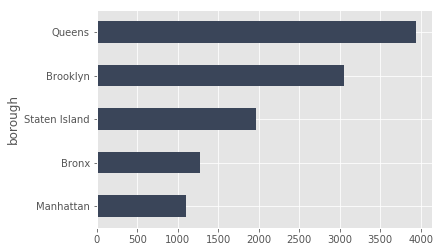

In [96]:
a.plot.barh(color='#3a4559')

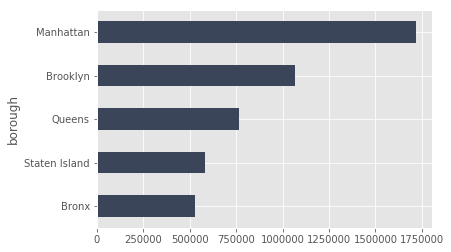

In [95]:
b.plot.barh(color='#3a4559')

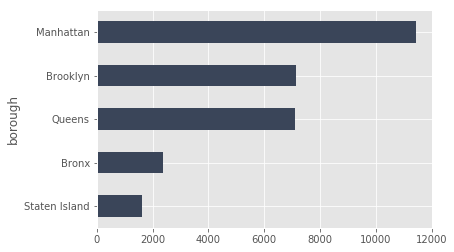

In [94]:
c.plot.barh(color='#3a4559')

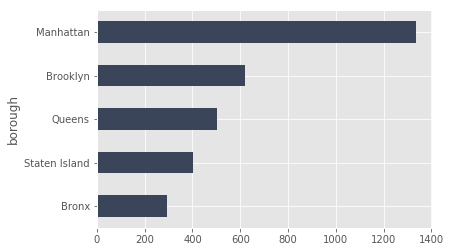

In [93]:
d.plot.barh(color='#3a4559')

In [92]:
d

borough
Bronx             292.779
Staten Island     403.258
Queens            503.325
Brooklyn          618.849
Manhattan        1333.850
Name: mean, dtype: float64

# Analysis by Property Size

In [168]:
round(trulia_copy1.describe(), 2)

,soldPrice,sqft,PricePerSQFT
count,11315.00,11315.00,11315.00
mean,880200.73,6056.46,573.92
std,858014.41,35225.27,765.58
min,10.00,224.00,0.00
25%,520000.00,1138.50,325.42
50%,705000.00,1524.00,451.13
75%,970000.00,2160.00,661.39
max,44580000.00,883265.00,68796.30


(7, 17)

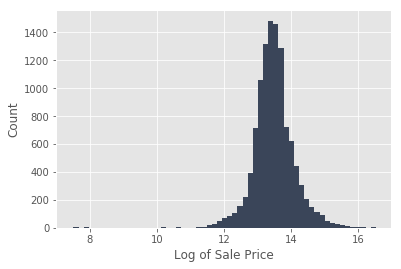

In [167]:
plt.hist(np.log(trulia_copy1['soldPrice']), bins=100, color="#3a4559")
plt.xlabel('Log of Sale Price')
plt.ylabel('Count')
# plt.title('Histogram of Sale Price', fontsize=20)
plt.xlim(7, 17)

Text(0,0.5,'Count')

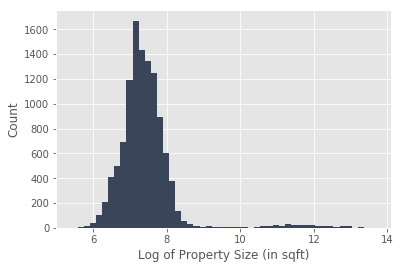

In [117]:
plt.hist(np.log(trulia_copy1['sqft']), bins = 50, color="#3a4559")
plt.xlabel('Log of Property Size (in sqft)')
plt.ylabel('Count')
# plt.title('Histogram of Sale Price', fontsize=20)
# plt.xlim(7, 17)

Text(0,0.5,'Sale Price')

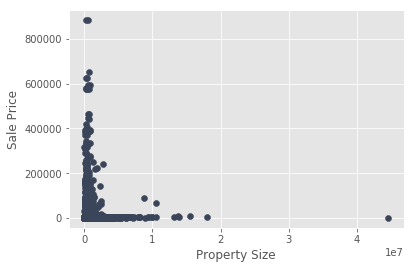

In [126]:
plt.scatter(trulia_copy1['soldPrice'], trulia_copy1['sqft'], color="#3a4559")
plt.xlabel('Property Size')
plt.ylabel('Sale Price')

In [139]:
trulia_scatter1 = trulia_copy1[['soldPrice', 'sqft']]
trulia_scatter1 = trulia_scatter1.loc[trulia_scatter1.apply(lambda x: (np.abs(x - x.mean()) / x.std()) < 3).all(axis=1)]

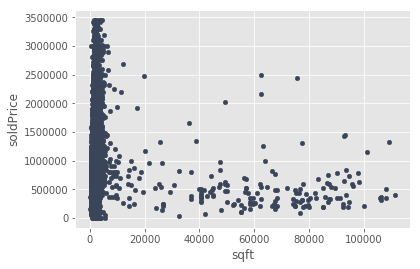

In [140]:
trulia_scatter1.plot.scatter(x='sqft', y='soldPrice', color="#3a4559")

In [136]:
trulia_copy2 = trulia_copy1.sort_values('sqft', ascending = False)
trulia_copy2.head(10)

,address,city,soldDate,soldPrice,sqft,zipCode,borough,PricePerSQFT
8830,270 Jay St #15J,Brooklyn,12-Jun-18,357000.0,883265,11201,Brooklyn,0.404182
11401,175 Adams St #14F,Brooklyn,4-Dec-18,585000.0,883265,11201,Brooklyn,0.662315
9468,201 Clinton Ave #15A,Brooklyn,6-Aug-18,720015.0,651914,11205,Brooklyn,1.104463
9511,2944 W 5th St #15E,Brooklyn,7-Aug-18,375000.0,623806,11224,Brooklyn,0.601148
9324,460 Neptune Ave #12M,Brooklyn,22-Jul-18,315000.0,623800,11224,Brooklyn,0.504970
11949,75 Henry St #8J,Brooklyn,8-Jan-19,550000.0,593599,11201,Brooklyn,0.926551
11137,75 Henry St #32A,Brooklyn,20-Nov-18,939000.0,593599,11201,Brooklyn,1.581876
6326,6115 98th St #10C,Rego Park,8-Jan-19,290000.0,580800,11374,Queens,0.499311
3296,7025 Yellowstone Blvd #9Y,Forest Hills,5-Jul-18,445000.0,575600,11375,Queens,0.773106
3542,7025 Yellowstone Blvd #9J,Forest Hills,23-Jul-18,690000.0,575600,11375,Queens,1.198749


In [145]:
trulia_copy1.corr()

,soldPrice,sqft,PricePerSQFT
soldPrice,1.000000,-0.044628,0.706792
sqft,-0.044628,1.000000,-0.096262
PricePerSQFT,0.706792,-0.096262,1.000000


Top 10 Zip Codes: Price per sqft.

In [146]:
len(trulia_copy1.zipCode.unique())

180

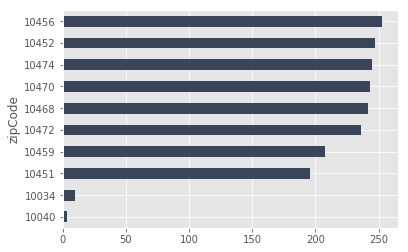

In [156]:
trulia_zipcode = trulia_copy1.groupby('zipCode')
summaryZipcode = round(trulia_zipcode.agg(['count', 'mean', 'std']), 3)
e = summaryZipcode['PricePerSQFT']['mean'].sort_values().head(10)
e.plot.barh(color='#3a4559')

Population per Borough =(US Census Bureau, 2010)

In [166]:
boroPop = pd.DataFrame([['Bronx', 1384794],
                        ['Brooklyn', 2504706],
                        ['Manhattan', 1586184],
                        ['Queens', 2230545],
                        ['Staten Island', 468730]],
                        columns =['Borough', 'Population (2010)'])
boroPop = boroPop.set_index('Borough')
boroPop = boroPop.sort_values('Population (2010)', ascending=False)
boroPop['Population (2010)'] = boroPop['Population (2010)'].apply(lambda x: "{:,}".format(x))
boroPop

,Population (2010)
Borough,
Brooklyn,"2,504,706"
Queens,"2,230,545"
Manhattan,"1,586,184"
Bronx,"1,384,794"
Staten Island,"468,730"
